# Ejercicios Pandas
Leer la URL desde github del archivo llamado [clientes.csv](https://raw.githubusercontent.com/rubisabel00/ciencias-de-datos-Sena/refs/heads/main/DocumentosNB03/clientes.csv) y conocer su informacion principal mediante el uso de atributos y metodos necesarios de pandas.

Realizar una descripcion estadistica de la informacion encontrada y normalizarla (Eliminar los null).

Generar una grafica representativa de la informacion obtenida.

Generar dos consultas de agrupamiento de valor agregado a la informacion obtenida.

Generar nuevas columnas segun sean requeridas para completar la informacion obtenida.

Exportar el trabajo realizado en los anteriores items a un archivo de excel.


# Import Libraries and Load Data
Import necessary libraries such as pandas, matplotlib, and numpy. Read the CSV file from the provided GitHub URL.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# Load the CSV file from the provided GitHub URL
url = 'https://raw.githubusercontent.com/rubisabel00/ciencias-de-datos-Sena/refs/heads/main/DocumentosNB03/clientes.csv'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text), on_bad_lines='skip')

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,01/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0


# Explore Data & Clean Data
Examine the dataset using attributes and methods (e.g., .head(), .info()). Identify and eliminate null values using dropna() or fillna().

In [3]:
# Explore Data & Clean Data

# Display basic information about the dataframe
df.info()

# Display summary statistics of the dataframe
df.describe()

# Check for null values in the dataframe
df.isnull().sum()

# Drop rows with any null values
df_cleaned = df.dropna()

# Verify that there are no more null values
df_cleaned.isnull().sum()

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    157 non-null    int64  
 1   Nombre                            155 non-null    object 
 2   Última fecha de compra            156 non-null    object 
 3   Frecuencia de compra              157 non-null    int64  
 4   Valor promedio de la compra       152 non-null    float64
 5   Categoría de productos comprados  151 non-null    object 
 6   Método de pago                    153 non-null    object 
 7   Edad                              154 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.9+ KB


,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,01/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0


# Statistical Description
Generate a descriptive statistical summary of the data using the .describe() method.

In [4]:
# Statistical Description

# Generate a descriptive statistical summary of the cleaned data
df_cleaned.describe()

,ID del cliente,Frecuencia de compra,Valor promedio de la compra,Edad
count,142.000000,142.000000,142.000000,142.000000
mean,83.070423,2.338028,119.960211,31.471831
std,48.192823,1.166235,258.158709,9.329047
min,1.000000,1.000000,20.000000,1.000000
25%,41.250000,1.000000,65.225000,26.000000
50%,84.500000,2.000000,85.100000,30.000000
75%,125.750000,3.000000,120.300000,37.000000
max,161.000000,5.000000,3110.000000,80.000000


# Plot Data Visualization
Create a representative graph of the dataset (e.g., using matplotlib) to visualize the findings.

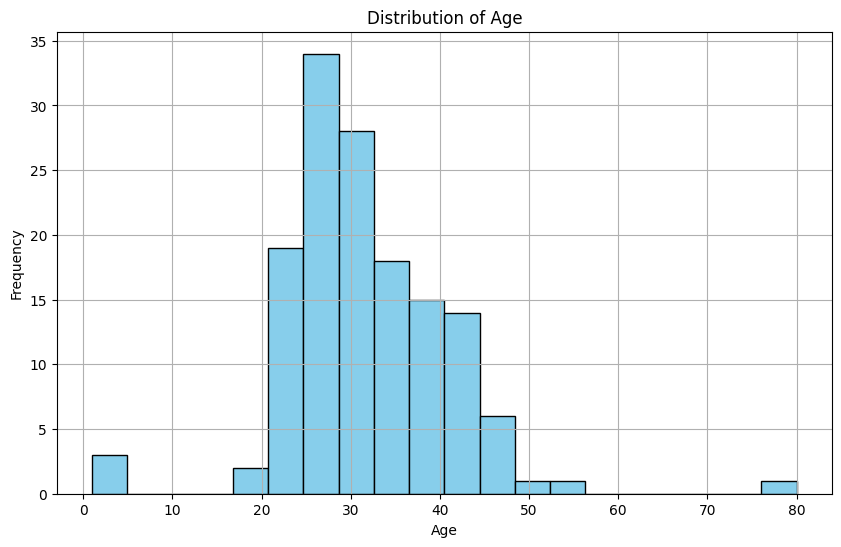

In [5]:
# Plot Data Visualization

# Create a representative graph of the dataset to visualize the findings
plt.figure(figsize=(10, 6))

# Example: Plotting the distribution of a numerical column (e.g., 'Age')
plt.hist(df_cleaned['Edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Aggregation Queries
Perform two aggregation queries using groupby() to compute valuable summaries (e.g., sum, mean, count).

In [6]:
# Aggregation Queries

# Perform the first aggregation query: Group by 'Método de pago' and compute the mean of 'Edad'
metodo_pago_edad_mean = df_cleaned.groupby('Método de pago')['Edad'].mean()
print("Mean Age by Payment Method:")
print(metodo_pago_edad_mean)

# Perform the second aggregation query: Group by 'Categoría de productos comprados' and compute the sum of 'Frecuencia de compra'
categoria_frecuencia_sum = df_cleaned.groupby('Categoría de productos comprados')['Frecuencia de compra'].sum()
print("\nTotal Purchase Frequency by Product Category:")
print(categoria_frecuencia_sum)

Mean Age by Payment Method:
Método de pago
Efectivo                  30.680000
Tarjeta de crédito        32.608696
Transferencia bancaria    31.195652
Name: Edad, dtype: float64

Total Purchase Frequency by Product Category:
Categoría de productos comprados
Alimentos       74
Electrónica    104
Juguetes        88
Ropa            66
Name: Frecuencia de compra, dtype: int64


# Add New Columns
Generate new columns based on calculations or transformations required to complete the dataset's information.

In [7]:
# Add New Columns

# Generate a new column 'Age_Group' based on the 'Edad' column
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Edad'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

# Generate a new column 'Purchase_Category' based on the 'Frecuencia de compra' column
df_cleaned['Purchase_Category'] = pd.cut(df_cleaned['Frecuencia de compra'], bins=[0, 5, 10, 20, 50, 100], labels=['0-5', '6-10', '11-20', '21-50', '51+'])

# Display the first few rows of the dataframe with the new columns
df_cleaned.head()

/var/folders/mg/k00gshw55879z1rg8j6jb0n40000gn/T/ipykernel_54499/1137733796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_Group'] = pd.cut(df_cleaned['Edad'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
/var/folders/mg/k00gshw55879z1rg8j6jb0n40000gn/T/ipykernel_54499/1137733796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Purchase_Category'] = pd.cut(df_cleaned['Frecuencia de compra'], bins=[0, 5, 10, 20, 50, 100], labels=['0-5',

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad,Age_Group,Purchase_Category
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0,19-35,0-5
1,2,Ana Rodriguez,01/04/2022,2,80.0,Juguetes,Efectivo,45.0,36-50,0-5
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0,19-35,0-5
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0,36-50,0-5
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0,19-35,0-5


# Export to Excel
Export the final processed DataFrame to an Excel file using the to_excel() function.

In [8]:
# Export to Excel

# Export the final processed DataFrame to an Excel file in path ./data/processed_clientes.xlsx
df_cleaned.to_excel('./data/processed_clientes.xlsx', index=False)
print("Data exported to Excel successfully!")

Data exported to Excel successfully!
